<a href="https://colab.research.google.com/github/diegos-analitic/intelligent-business/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final - diabetes

Realizado por: Juan Diego Álvarez y Carolina Ortega

Link video: https://youtu.be/2oaUYKH57Hs

Link GitHub: https://github.com/Caro404/Final-anal-tica/blob/68135a4bed7eee0fdae139df9ba4efbb87350a37/TP1/Final.ipynb

In [1]:
#LIBRERIAS

from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from keras.models import Sequential # es una hoja de cálculo
from keras.layers import Dense # Coloca cuantas neuronas quiero
import tensorflow as tf

from sklearn.naive_bayes import GaussianNB
# Campana de gaus

# knn means - Google minería de datos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Métricas para evaluar los modelos
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Mounted at /content/drive


In [2]:
# CONEXIÓN CON LOS DATOS

nxl = "/content/drive/MyDrive/Analitica de negocios./diabetes.csv"
data = pd.read_csv(nxl)
data = data.dropna()
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


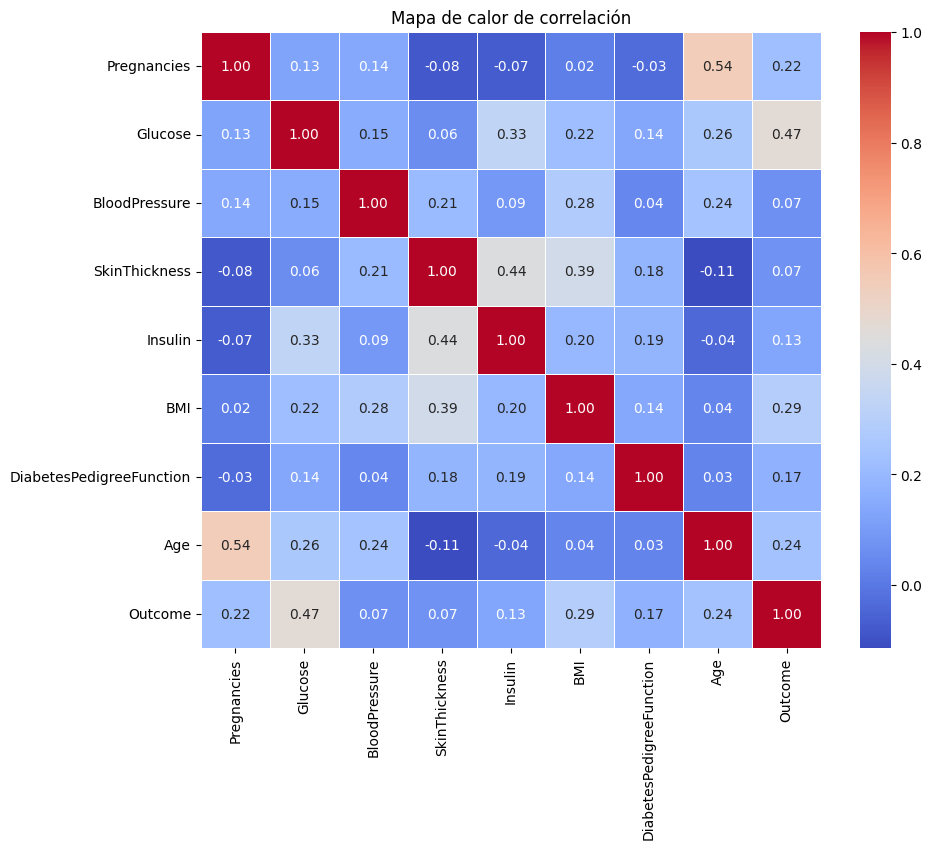

In [3]:
#Correlación Inicial
data.corr()

#Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de calor de correlación')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


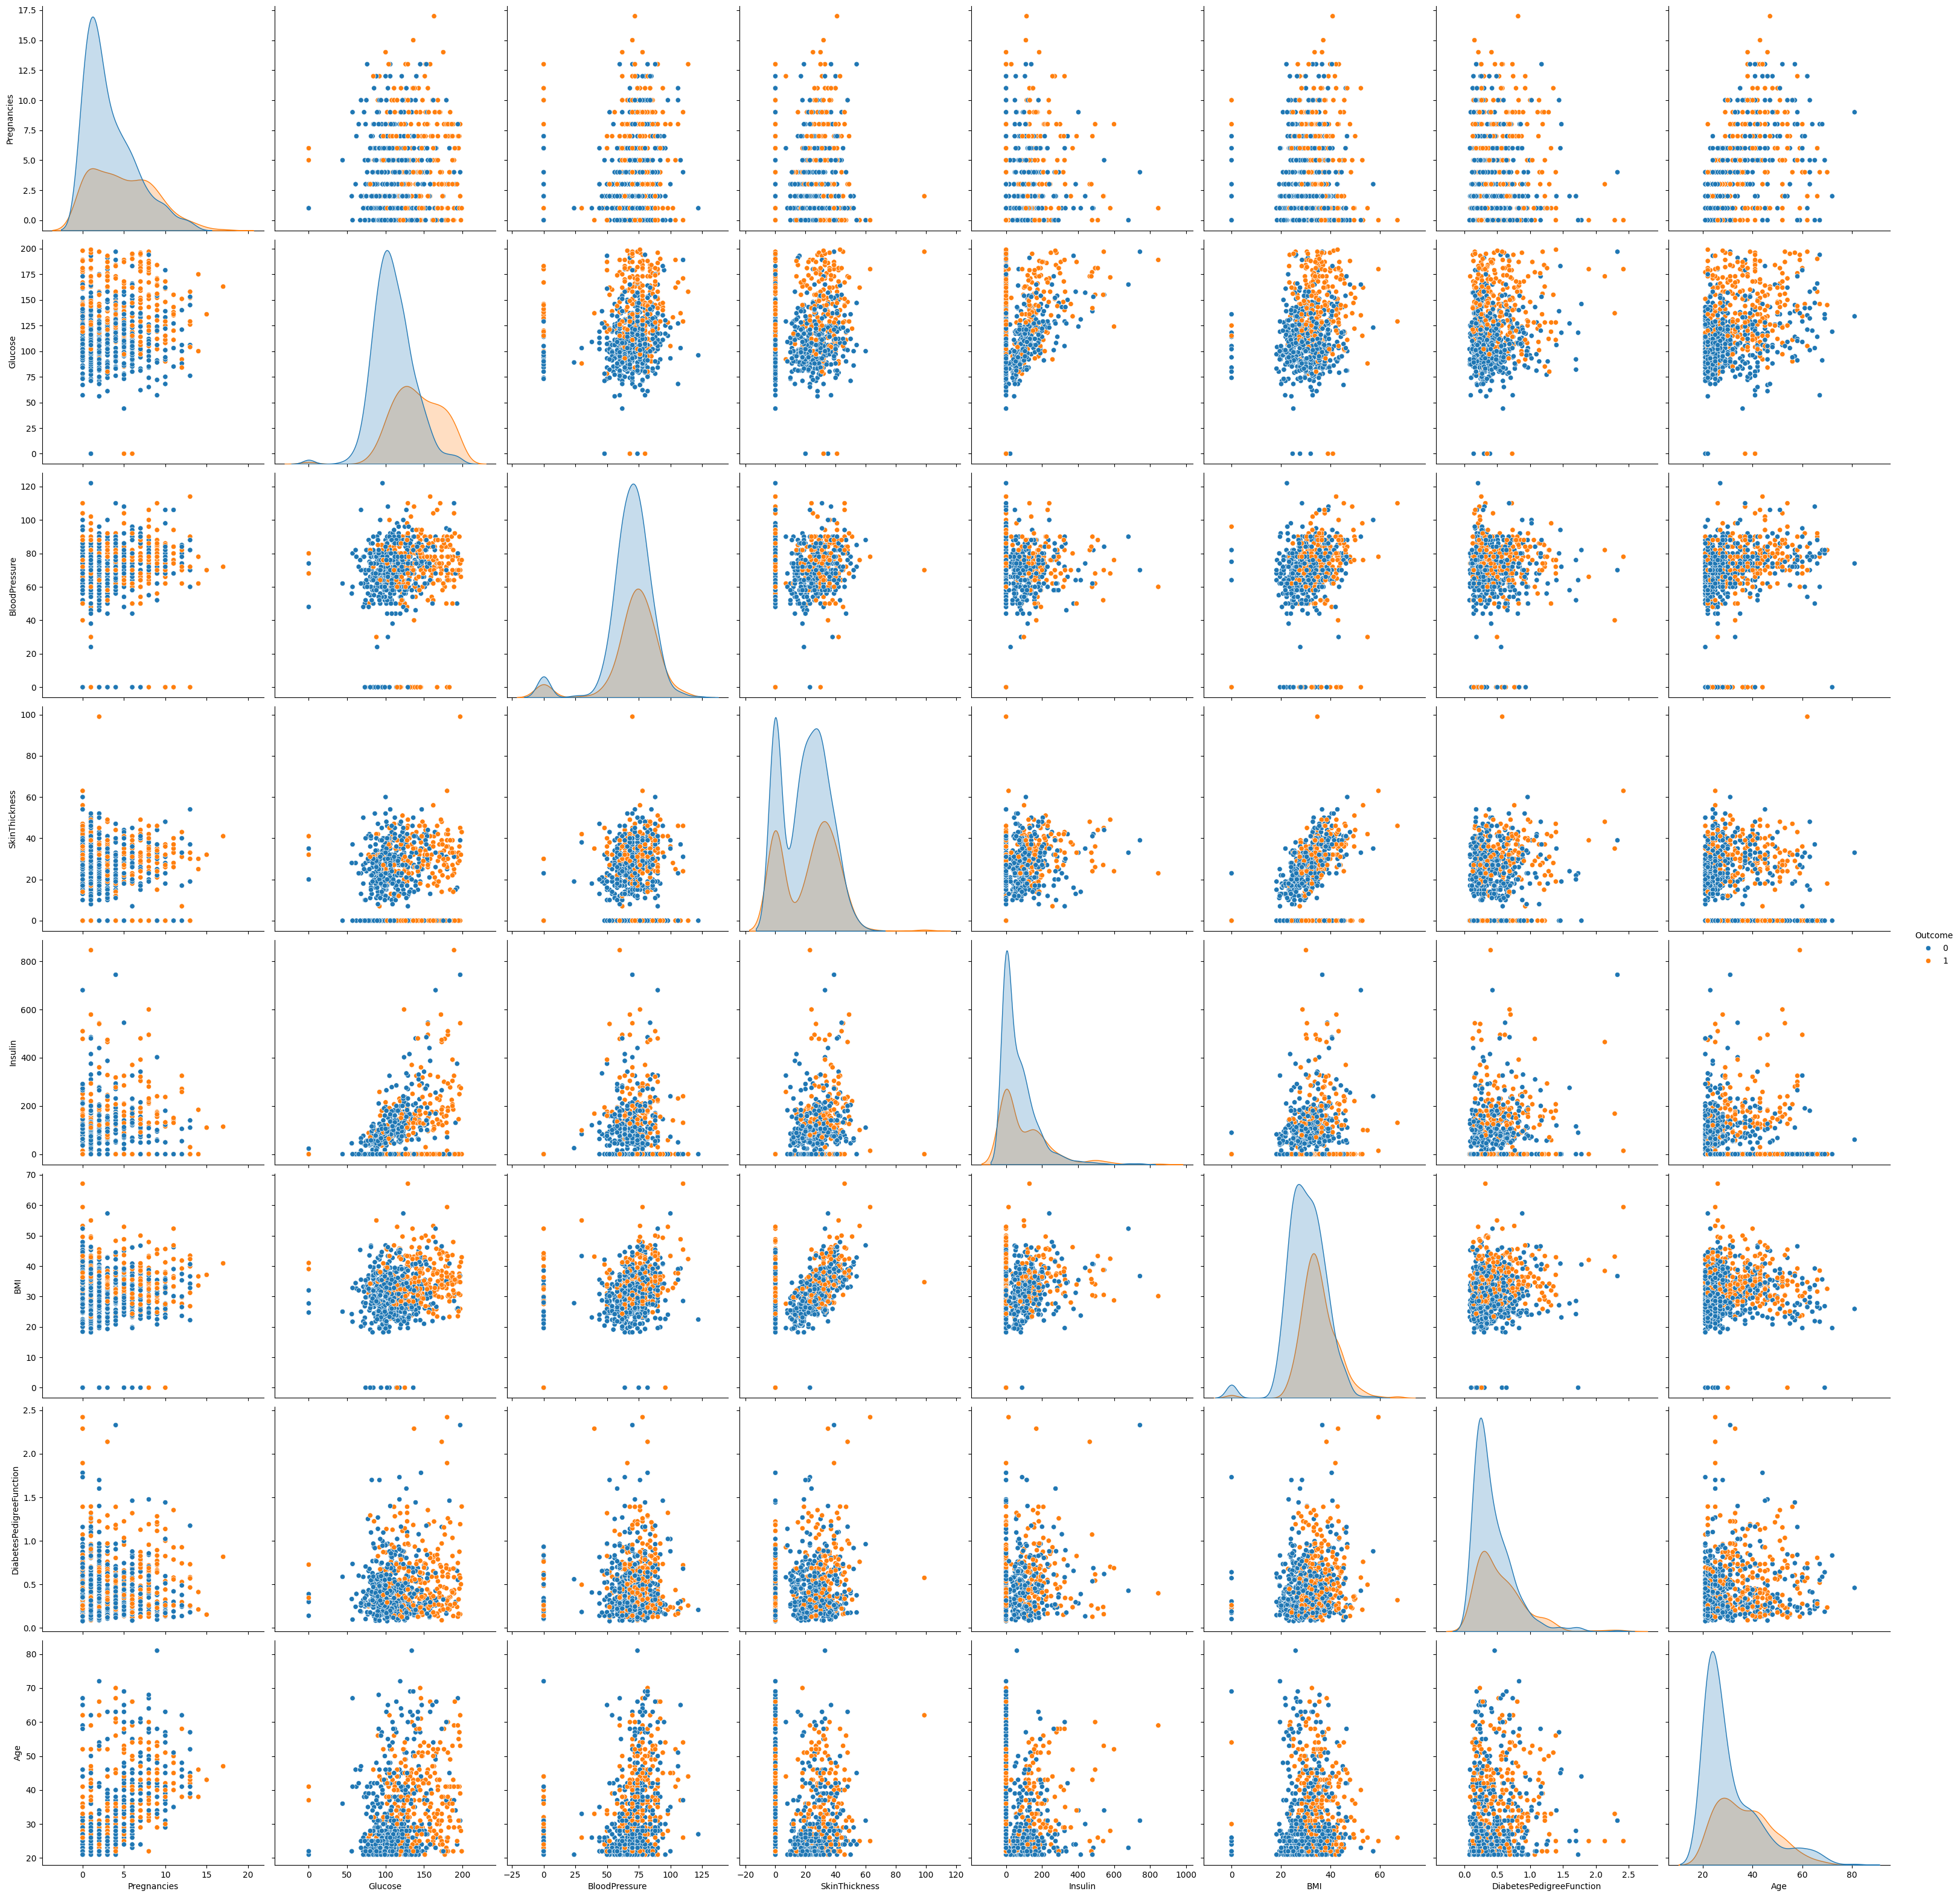

In [4]:
#Creación de dashboard'
sns.pairplot(data, hue="Outcome", size = 4, vars=["Pregnancies", "Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])

## Análisis

En primer lugar, nos encontramos con el mapa de calor de correlación, donde observamos que varias variables que tienen una correlación considerable, donde vendría siendo la edad y estar embarazadas(0,5), o la glucosa con outcome (si tiene diabetes, 0,47), e incluso el grosor de la piel con la insulina (0,44) y con el indice de masa corporal BMI (0,33). Las demás variables no presentan una correlación significativa, ya que sus valores tienden a ser inferiores a 0,2.

Con respecto al Dashboard, observamos que la correlación que se gráficaba anteriormente a través de los datos se materializa a través de puntos, donde la dispersión de los datos es notoria, confirmando que no hay alguna variable que tenga una correlación de 1, sin embargo, hay gráficos que presentan una distribución muy similar y conjunta como el skithickness (grosor de la piel) con el BMI.

## Aplicamos el modelo Naive Bayes

In [5]:
variables = np.array(data[["Pregnancies", "Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]])
salida = np.array(data[["Outcome"]])

naiveBayes = GaussianNB()
naiveBayes.fit(variables, salida)

#Obtenemos los valores de las medias
u = naiveBayes.theta_
print("Las medias de las variables son: \n", u[0])
print()

#Se procede con el calculo de la desviación
sigma = np.sqrt(naiveBayes.var_)
print("La desviación estandar es: \n", sigma[0])
print()

#Evaluamos el comportamiento del modelo
yNaiveBayes = naiveBayes.predict(variables)
matrix_confusión = confusion_matrix(salida, yNaiveBayes)
print("La matrix de confusión es: \n", matrix_confusión)
print()


#Cuantos hay por categoria
ndc = naiveBayes.class_count_
print("Para cada categoria se tienen: \n", ndc)

Las medias de las variables son: 
 [  3.298    109.98      68.184     19.664     68.792     30.3042
   0.429734  31.19    ]

La desviación estandar es: 
 [ 3.01416809 26.11504573 18.04500366 14.87505016 98.76637459  7.68216217
  0.29880826 11.65598187]

La matrix de confusión es: 
 [[421  79]
 [103 165]]

Para cada categoria se tienen: 
 [500. 268.]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metricas Naive Bayes

In [6]:
verdadero_negativo = matrix_confusión[1,1]
vn = verdadero_negativo

verdadero_positivo = matrix_confusión[0,0]
vp = verdadero_positivo

falso_positivo = matrix_confusión[1,0]
fp = falso_positivo

falso_negativo = matrix_confusión[0,1]
fn = falso_negativo

total = vn + vp + fn + fp

# Tasa de error
T_Error = (fn + fp)/total
print("La tasa de error", str(100*T_Error), "%")

# Sensibilidad
sensibilidad = vn/(vn + fp)
print("La sensibilidad = ", str(100*sensibilidad), "%")

# Exactitud
exactitud = (vn + vp)/total
print("Exactitud", str(100*exactitud), "%")

# Especificidad
especificidad = fp/(fn+vp)
print("La especifidad", str(100*especificidad), "%")

# Precisión
precision = vn/(vn+vp)
print("La precisión", str(100*precision), "%")

La tasa de error 23.697916666666664 %
La sensibilidad =  61.56716417910447 %
Exactitud 76.30208333333334 %
La especifidad 20.599999999999998 %
La precisión 28.15699658703072 %


Aplicamos KNN


In [7]:
variables = np.array(data[["Pregnancies", "Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]])
salida = np.array(data[["Outcome"]])

mknn = KNeighborsClassifier()
mknn.fit(variables, salida)
pronostico = mknn.predict(variables)

print("La precisión en este pronóstico es: ", metrics.accuracy_score(salida, pronostico))

La precisión en este pronóstico es:  0.8033854166666666


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:
# Presentamos las métricas
# Matrix de confusión KNN
confusion = confusion_matrix(salida, pronostico)
VP = confusion[0,0]
VN = confusion[1,1]
FN = confusion[0,1]
FP = confusion[1,0]

print("El coeficiente de sensibilidad es: ", VP /(VP + FN), '%')
print("El coeficiente de especificidad es: ", VN /(FP + VN), '%')
print("El coeficiente de tasa de error es: ", (FN + FP) /(FN + VN + FP + VP), '%')
print("El coeficiente de Exactitud es: ", (VN + VP) /(FN + VN + FP + VP), '%')
print("El coeficiente de Precisión es: ", VN/(VP + VN), '%')

El coeficiente de sensibilidad es:  0.884 %
El coeficiente de especificidad es:  0.6529850746268657 %
El coeficiente de tasa de error es:  0.19661458333333334 %
El coeficiente de Exactitud es:  0.8033854166666666 %
El coeficiente de Precisión es:  0.28363047001620745 %


### Análisis

Luego de aplicar el modelo de Naive Bayes, observando las métricas que arroja luego de su ejecución, podemos decir que, en general tuvo un buen comportamiento el modelo, con una exactitud de 0,80. Sin embargo, el porcentaje de la tasa de error, tiene un valor de un 20%, puede ser considerable este porcentaje, pero no de tal forma que permita desechar por completo el modelo.

El coeficiente de sensibilidad también tuvo un valor alto de 0.88, lo que nos indica que la calidad de los datos es alta y contribuye a la correcta funcionabilidad del modelo.

## Modelos de redes neuronales.

In [9]:
# Datos en bruto
variables = np.array(data[["Pregnancies", "Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]])
variable_aprendizaje = np.array(data[["DiabetesPedigreeFunction"]])
VA = variable_aprendizaje

#Normalización base de los datos
norm = variables/np.max(variables, axis = 0) # el axis 0 es que busque el máximo por columnas

#norm_inc = (VA - np.mean(VA))/np.std(VA)# Método de centramiento
norm_inc = VA

prob_inc = 1/(1 + np.exp(-norm_inc)) #Esta es la probabilidad de un  alto
print("La probabilidad de que haya un score alto es de: DiabetesPedigreeFunction ", prob_inc)


La probabilidad de que haya un score alto es de: DiabetesPedigreeFunction  [[0.65180891]
 [0.58686006]
 [0.66195085]
 [0.54165324]
 [0.90787832]
 [0.5500815 ]
 [0.56168417]
 [0.53344996]
 [0.53941803]
 [0.55774124]
 [0.54760536]
 [0.63111427]
 [0.80860946]
 [0.59820704]
 [0.64267651]
 [0.61869197]
 [0.63436757]
 [0.56316079]
 [0.54562275]
 [0.62924985]
 [0.66907403]
 [0.59580115]
 [0.61087697]
 [0.56537361]
 [0.56316079]
 [0.55107127]
 [0.56389868]
 [0.61939945]
 [0.56094545]
 [0.5834616 ]
 [0.63320706]
 [0.70077687]
 [0.56635626]
 [0.54686206]
 [0.6252752 ]
 [0.7243215 ]
 [0.60348325]
 [0.66038267]
 [0.62316408]
 [0.80059224]
 [0.56733839]
 [0.66730032]
 [0.55848111]
 [0.67282719]
 [0.57297512]
 [0.86909721]
 [0.63737756]
 [0.64244683]
 [0.58516184]
 [0.57566435]
 [0.62034198]
 [0.62854969]
 [0.58467626]
 [0.61467345]
 [0.67216645]
 [0.56168417]
 [0.56316079]
 [0.72352206]
 [0.8558203 ]
 [0.54314245]
 [0.57542006]
 [0.5670929 ]
 [0.64267651]
 [0.66796602]
 [0.56414458]
 [0.55057644]
 

In [10]:
# Definimos número de entradas - ADALINE
NE = 7
model = Sequential() #Cortex cerebral

model.add(Dense(1, activation = "linear", use_bias = False, input_dim = NE))
model.compile(optimizer = "adam", loss = "mse") #adam es la función para disminuir el error
model.fit(norm, norm_inc) # encontrara la relación entre las variables, aca le adicione la red neuronal
history = model.fit(norm, norm_inc, epochs = 1000, batch_size= 70)
prediccion = model.predict(norm)
# La idea es que loss llegue a 0

#Matriz de Correlación
df1 = pd.DataFrame(np.column_stack((norm_inc, prediccion)))
df1.columns = [["VA", "Predicción"]]
print(df1.corr())

#Efectos Independientes
w = model.layers[0].get_weights()
print("Los efectos independientes de madaline serían \n:", w)


24/24 [==============================] - 0s 2ms/step - loss: 1.2112
Epoch 1/1000
11/11 [==============================] - 0s 2ms/step - loss: 1.1178
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 1.0629
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step - loss: 1.0093
Epoch 4/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.9586
Epoch 5/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.9100
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.8639
Epoch 7/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.8199
Epoch 8/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.7772
Epoch 9/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.7375
Epoch 10/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.6996
Epoch 11/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6634
Epoch 12/1000
11/11 [==================

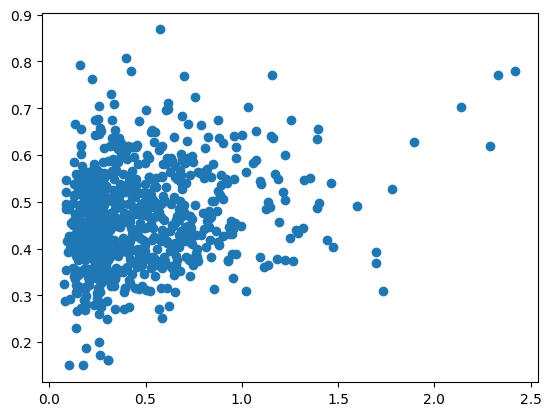

<Figure size 640x480 with 0 Axes>

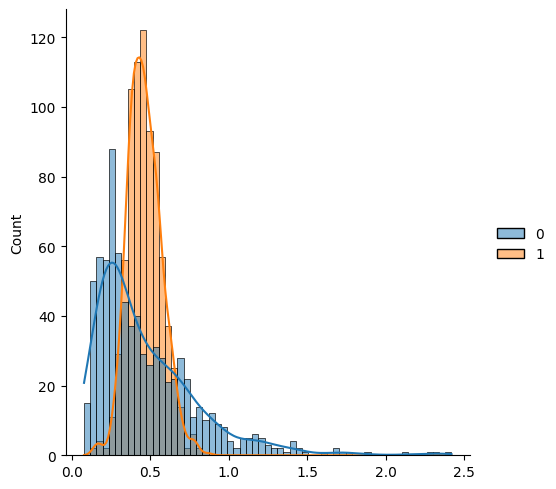

In [11]:
#Grafico de dispersión
plt.figure()
plt.scatter(norm_inc, prediccion)
plt.show()

#Como son las distribuciones de los datos
plt.figure()
sns.displot((norm_inc.flatten(), prediccion.flatten()),kde=True)
plt.show()

La discrepancia de las medias es: 24.218829493158292
La discrepancia entre las variación estandar es:  -50.879678880304965


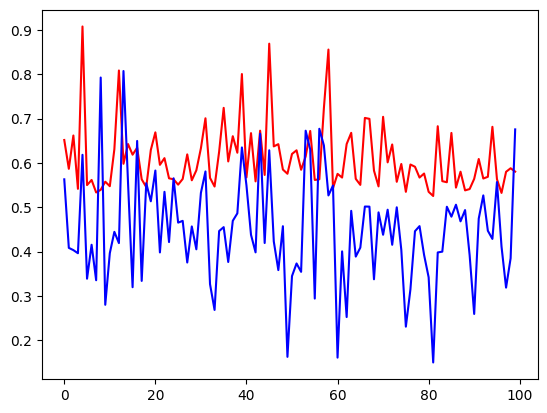

In [12]:
#DISCREPANCIAS

#Discrepancia de las medias
dsm2 = (np.mean(prob_inc) - np.mean(prediccion))/np.mean(prob_inc)
print("La discrepancia de las medias es:", dsm2*100)

#Discrepancia de las desviación estandar
ds_dsv2 = (np.std(prob_inc) - np.std(prediccion))/(np.std(prob_inc))
print("La discrepancia entre las variación estandar es: ", ds_dsv2*100)

#La gráfica de los datos de referencia es
plt.figure()
plt.plot(prob_inc[0:100,],"r", prediccion[0:100,], "b")
plt.show()

## Análisis Adeline

Con este modelo observamos un buen desarrollo de los datos, donde presenta comportamientos similares, como se vislumbra en el gráfico de distribución y el de discrepancias, sin embargo, existe mucho ruido entre los datos, donde existe un desfase pronunciado entre estos comportamientos similares, por lo que el modelo Adeline presenta resultado aceptables y se recomienda este modelo.

In [13]:
# Definimos numero de entradas - MADALINE
NE = 7
model = Sequential()
model.add(Dense(10,activation = 'linear' ,use_bias = False, input_dim=NE))
model.add(Dense(1, activation = "linear"))
model.compile(optimizer='adam', loss='mse')
history = model.fit(norm, norm_inc, epochs=1000, batch_size=70)
ys = model.predict(norm)

#Matriz de Correlación
df = pd.DataFrame(np.column_stack((norm_inc, ys)))
df.columns = [["VA", "Predicción"]]
print(df.corr())

#Efectos Independientes
W2 = model.layers[0].get_weights()[0]
C2 = model.layers[1].get_weights()[0]
np.dot(W2,C2)



Epoch 1/1000
11/11 [==============================] - 1s 3ms/step - loss: 0.9829
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.7336
Epoch 3/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.5398
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.3971
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2984
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.2369
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1992
Epoch 8/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1782
Epoch 9/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1679
Epoch 10/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1617
Epoch 11/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.1587
Epoch 12/1000
11/11 [==============================] - 0s 3ms/step - loss: 0.1559
Epoch 13/1000
11/11 [====

array([[-0.1024622 ],
       [ 0.16224606],
       [-0.06500167],
       [ 0.25010288],
       [ 0.22895858],
       [ 0.1781584 ],
       [ 0.15526228]], dtype=float32)

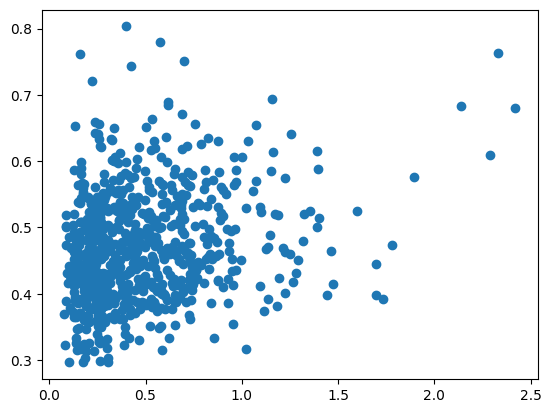

<Figure size 640x480 with 0 Axes>

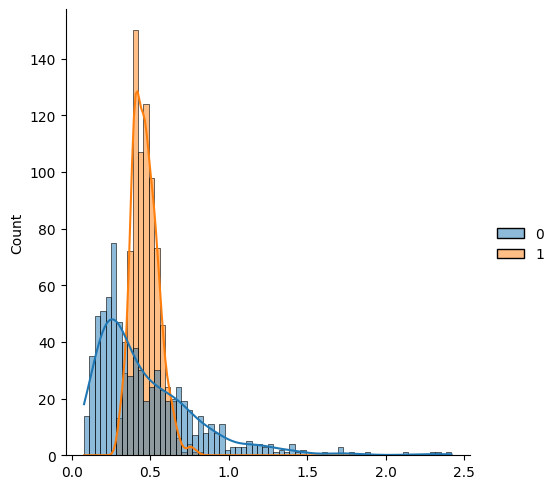

In [14]:
#Grafico de dispersión
plt.figure()
plt.scatter(norm_inc, ys)
plt.show()

#Como son las distribuciones de los datos
plt.figure()
sns.displot((norm_inc.flatten(), ys.flatten()),kde=True)
plt.show()

La discrepancia de las medias es: 24.218829493158292
La discrepancia entre las variación estandar es:  -50.879678880304965


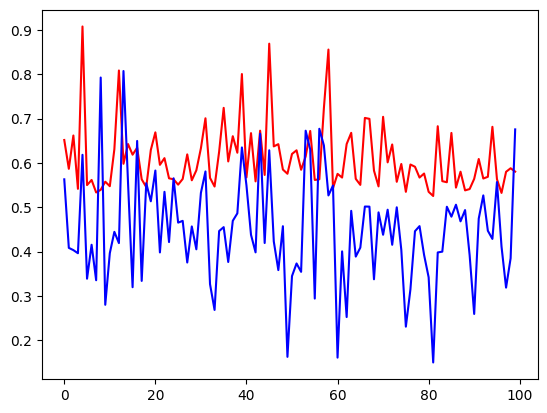

In [15]:
#DISCREPANCIAS

#Discrepancia de las medias
dsm2 = (np.mean(prob_inc) - np.mean(prediccion))/np.mean(prob_inc)
print("La discrepancia de las medias es:", dsm2*100)

#Discrepancia de las desviación estandar
ds_dsv2 = (np.std(prob_inc) - np.std(prediccion))/(np.std(prob_inc))
print("La discrepancia entre las variación estandar es: ", ds_dsv2*100)

#La gráfica de los datos de referencia es
plt.figure()
plt.plot(prob_inc[0:100,],"r", prediccion[0:100,], "b")
plt.show()

## Análisis

En el modelo Madaline, observamos que a pesar contar con un ruido similar al adaline y contar un distribuciones de los datos dispersas, en este se observa que los datos no hay tanta similitud, hay ua dispersión pronunciada y el desfase de los datos se encuentra igual.

Por lo que, a pesar de presentar datos similares, este modelo no tiene tanta similitud en sus gráficas entre variables de pronóstico, por lo que se recomienda implementar adaline en vez de madeline

### Sacamos algunos informes

In [16]:
df1.to_excel("PronosticoADALINE.xlsx")
df.to_excel("PronosticoMADALINE.xlsx")

### Conclusión final.

El estudio ha permitido identificar relaciones significativas entre diversas variables y su la probabilidad de heredar diabetes y padecer o no diabetes, ha mostrado una capacidad limitada, con un rendimiento ligeramente en el modelo KNN para pronosticar el dato de Outcome con una exactitud del 80%, por otro lado, el modelo MADALINE Presenta una mejor rendimiento para predecir el DiabetesPedigreeFunction con una correlación de 0,25. Las variables Age and pregnacies presentan una alta correlación de 0.5, mientras que glucosa and outcome son más relevantes para el largo plazo con una correlación de 0,4. Estos hallazgos proporcionan una base guia para el estudio de las variables que influenyen el pronóstico de la diabetes con respecto a variables relacionadas de los sujetos, pero queda corto para realizar un estudio completo a profundida.

Se recomienda para la implementación de un modelo similar en un futuro, depurar algunas de las variables que no tienen tanta correlación con el pronóstico de la diabetes, ademas incluir otro tipo de variables que puedan tener un mejor impacto al predecir, por último se podria sugerir implementar otros modelos como arboles de decisión.